### <font color= 'white'> S&P 500 PostCovid *Optimizations & ML models*<font> 

##### [![S&P500-PostCovid_ML](https://img.shields.io/badge/Repository-S&P500--PostCovid--ML-020521?style=flat-square&logo=github&logoColor=white)](https://mango-dune-07a8b7110.1.azurestaticapps.net/?repo=EstebanMqz%2FSP500-Risk-Optimized-Portfolios-PostCovid-ML)

##### <font color= 'blue'> *Introduction.* <font>

<font color= 'lightgray'> 
Time series modelling is a powerful forecast tool and the stock market tends to be an interesting example because statistical estimators are of special interest.<br> 
They are used used in all types of industries, including but not limited to:<br>

- Government
- Banking
- Insurance
- Energy
- Healthcare
- Telecommunications
- Retail
- Education

This is made in order to predict variables, their interaction with other variables and for decision-making per se.


##### <font color= 'blue'> *Objective.* <font>

<font color= 'lightgray'>

In this project, parameters $r_{t}$ $\&$ $\sigma_i$ and Disperssion metrics are calculated in order to analyze and predict $X_i\in [X_1,X_{500}]$ in the $S\&P500$ individually.<br> 
Then, optimizations are made based on certain requirements and constraints for $X_{P{_{R{max}}}}$ vs $X_{P{_{R_{j}}}}$ in order to implement a ML model to predict $X_{P{_{R{max}}}}$<br>

### <font color= 'blue'> 0. Requirements. <font>

##### <font color= 'blue'> 0.1 <u> Load Dependencies: </u><font>

In [15]:
import functions as fn
import data as dt
import visualizations as vs 

##### <font color= 'blue'> 0.2 <u> Install Libs. & Modules: </u><font>

<span style='color:orange'> Project Creators:</span> Create `requirements.txt` file:

<span style='color:lightyellow'> *Skip to `requirements.txt` installation if not contributing to the project.* <font>

In [16]:
docstring = """
# -- -------------------------------------------------------------------------------------- -- # 
# -- project: S&P500-Risk-Optimized-Portfolios-PostCovid-ML                                 -- # 
# -- script: requirements.txt: txt file to download Python modules for execution            -- # 
# -- author: EstebanMqz                                                                     -- # 
# -- license: CC BY 3.0                                                                     -- # 
# -- repository: SP500-Risk-Optimized-Portfolios-PostCovid-ML/blob/main/requirements.txt    -- #                                  
# -- -------------------------------------------------------------------------------------- -- # 
\n
"""

path = fn.get_requirements(docstring)

requirements.txt file created in local path: c:\Users\Esteban\Desktop\Projects\Github\Repos_To-do\Languages\Python\Fin_Sim\Projects\SP500-Risk-Optimized-Portfolios-ML\requirements.txt


<span style='color:green'> Project Users:</span> Install packages in `requirements.txt` file: <br>

In [92]:
fn.library_install("requirements.txt")

Requirements installed.

# -- -------------------------------------------------------------------------------------- -- # 
# -- project: S&P500-Risk-Optimized-Portfolios-PostCovid-ML                                 -- # 
# -- script: requirements.txt: txt file to download Python modules for execution            -- # 
# -- author: EstebanMqz                                                                     -- # 
# -- license: CC BY 3.0                                                                     -- # 
# -- repository: SP500-Risk-Optimized-Portfolios-PostCovid-ML/blob/main/requirements.txt    -- #                                  
# -- -------------------------------------------------------------------------------------- -- # 


numpy >= 1.22.4 
pandas >= 1.4.4 
matplotlib >= 3.5.3 
scipy >= 1.7.3 
sklearn >= 1.0.2 
logging >= 0.5.1.2 
jupyter >= 1.0.0 
yahoofinanicals >= 1.14 
tabulate >= 0.8.9 
IPython >= 8.12.0 
fitter >= 1.5.2 



##### <font color= 'blue'> 0.3 <u> Load Libraries & Modules </u><font>

In [ ]:
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None
              ,"display.max_colwidth", None, "display.width", None)

import matplotlib
import matplotlib.pyplot as plt
plt.style.use("dark_background")
%matplotlib inline

import scipy
import scipy.stats as st
from scipy import optimize
from scipy.optimize import minimize

import sklearn
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV 
from sklearn import metrics

from yahoofinancials import YahooFinancials 
from tabulate import tabulate
import IPython.display as d

import datetime 
import time

from io import StringIO
from fitter import Fitter, get_common_distributions, get_distributions 
import logging
import ast

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning)

### <font color= 'blue'> 1. Data Extraction <font>

The following are the $S\&P500$ quotes symbols from *A-Z*:

<span style='color:lightyellow'> *Fetching a lot of data from Yahoo Finance by batches is required to avoid host disruptions (other sources could be used instead).* <font> &nbsp;

In [ ]:
tickers=fn.SP500_tickers(50)
tickers[0][0:5], tickers[-1][0:5]

(['MMM', 'AOS', 'ABT', 'ABBV', 'ACN'], ['ZBH', 'ZION', 'ZTS'])

#### <font color= 'blue'> 1.1 <u> Fetching Data </u><font> </span>


<span style='color:lightyellow'> *Skip to 1.2 if you prefer using .csv creation date rather than execution's date.* <font> &nbsp; 


$6_Y$ of adj closes from the $S\&P$ $500$ quotes are fetched *(5min.)*.

In [ ]:
SP_Assets_f = pd.concat([dt.get_historical_price_data(tickers[i][j], 6) 
                         for i in range(0, len(tickers)) for j in range(0, len(tickers[i]))], axis=1)

In [ ]:
SP_f = dt.get_historical_price_data('^GSPC', 6)
SP_f = SP_f[SP_f.index.isin(SP_Assets_f.index)]

Fetched data saved in `Assets_SP500.csv` $\&$ `SP500_index.csv` files in *subdirectory $\rightarrow$ `Data`*

In [ ]:
SP_Assets_f.to_csv("Data/Assets_SP500.csv")   
SP_f.to_csv("Data/SP500.csv")

In [ ]:
SP_Assets_f.head(8)

,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,AAP,AES,AFL,A,APD,AKAM,ALK,ALB,ARE,ALGN,ALLE,LNT,ALL,GOOGL,GOOG,MO,AMZN,AMCR,AMD,AEE,AAL,AEP,AXP,AIG,AMT,AWK,AMP,ABC,AME,AMGN,APH,ADI,ANSS,AON,APA,AAPL,AMAT,APTV,ACGL,ANET,AJG,AIZ,T,ATO,ADSK,AZO,AVB,AVY,AXON,BKR,BALL,BAC,BBWI,BAX,BDX,WRB,BRK-B,BBY,BIO,TECH,BIIB,BLK,BK,BA,BKNG,BWA,BXP,BSX,BMY,AVGO,BR,BRO,BF-B,BG,CHRW,CDNS,CZR,CPT,CPB,COF,CAH,KMX,CCL,CARR,CTLT,CAT,CBOE,CBRE,CDW,CE,CNC,CNP,CDAY,CF,CRL,SCHW,CHTR,CVX,CMG,CB,CHD,CI,CINF,CTAS,CSCO,C,CFG,CLX,CME,CMS,KO,CTSH,CL,CMCSA,CMA,CAG,COP,ED,STZ,CEG,COO,CPRT,GLW,CTVA,CSGP,COST,CTRA,CCI,CSX,CMI,CVS,DHI,DHR,DRI,DVA,DE,DAL,XRAY,DVN,DXCM,FANG,DLR,DFS,DISH,DIS,DG,DLTR,D,DPZ,DOV,DOW,DTE,DUK,DD,DXC,EMN,ETN,EBAY,ECL,EIX,EW,EA,ELV,LLY,EMR,ENPH,ETR,EOG,EPAM,EQT,EFX,EQIX,EQR,ESS,EL,ETSY,RE,EVRG,ES,EXC,EXPE,EXPD,EXR,XOM,FFIV,FDS,FICO,FAST,FRT,FDX,FITB,FSLR,FE,FIS,FISV,FLT,FMC,F,FTNT,FTV,FOXA,FOX,BEN,FCX,GRMN,IT,GEHC,GEN,GNRC,GD,GE,GIS,GM,GPC,GILD,GL,GPN,GS,HAL,HIG,HAS,HCA,PEAK,HSIC,HSY,HES,HPE,HLT,HOLX,HD,HON,HRL,HST,HWM,HPQ,HUM,HBAN,HII,IBM,IEX,IDXX,ITW,ILMN,INCY,IR,PODD,INTC,ICE,IFF,IP,IPG,INTU,ISRG,IVZ,INVH,IQV,IRM,JBHT,JKHY,J,JNJ,JCI,JPM,JNPR,K,KDP,KEY,KEYS,KMB,KIM,KMI,KLAC,KHC,KR,LHX,LH,LRCX,LW,LVS,LDOS,LEN,LNC,LIN,LYV,LKQ,LMT,L,LOW,LYB,MTB,MRO,MPC,MKTX,MAR,MMC,MLM,MAS,MA,MTCH,MKC,MCD,MCK,MDT,MRK,META,MET,MTD,MGM,MCHP,MU,MSFT,MAA,MRNA,MHK,MOH,TAP,MDLZ,MPWR,MNST,MCO,MS,MOS,MSI,MSCI,NDAQ,NTAP,NFLX,NWL,NEM,NWSA,NWS,NEE,NKE,NI,NDSN,NSC,NTRS,NOC,NCLH,NRG,NUE,NVDA,NVR,NXPI,ORLY,OXY,ODFL,OMC,ON,OKE,ORCL,OGN,OTIS,PCAR,PKG,PARA,PH,PAYX,PAYC,PYPL,PNR,PEP,PKI,PFE,PCG,PM,PSX,PNW,PXD,PNC,POOL,PPG,PPL,PFG,PG,PGR,PLD,PRU,PEG,PTC,PSA,PHM,QRVO,PWR,QCOM,DGX,RL,RJF,RTX,O,REG,REGN,RF,RSG,RMD,RHI,ROK,ROL,ROP,ROST,RCL,SPGI,CRM,SBAC,SLB,STX,SEE,SRE,NOW,SHW,SPG,SWKS,SJM,SNA,SEDG,SO,LUV,SWK,SBUX,STT,STLD,STE,SYK,SYF,SNPS,SYY,TMUS,TROW,TTWO,TPR,TRGP,TGT,TEL,TDY,TFX,TER,TSLA,TXN,TXT,TMO,TJX,TSCO,TT,TDG,TRV,TRMB,TFC,TYL,TSN,USB,UDR,ULTA,UNP,UAL,UPS,URI,UNH,UHS,VLO,VTR,VRSN,VRSK,VZ,VRTX,VFC,VTRS,VICI,V,VMC,WAB,WBA,WMT,WBD,WM,WAT,WEC,WFC,WELL,WST,WDC,WRK,WY,WHR,WMB,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
formatted_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-05-18,161.040283,47.841511,38.807003,50.266285,110.057076,53.495728,34.953682,134.539993,86.790024,137.649109,9.207952,31.724339,53.345467,123.802757,47.000000,78.261253,102.006996,98.774307,137.690002,72.405937,33.232956,74.185822,47.525002,46.512001,47.018017,47.924500,8.574127,11.28,46.926456,43.335861,55.686268,70.088409,52.156330,112.840874,67.771454,108.993820,78.687943,56.812534,133.256958,34.139393,71.582153,120.339996,119.744453,44.245632,35.886833,40.840878,69.673470,31.753332,35.869999,49.738529,87.769356,17.833263,70.305252,95.830002,673.789978,156.858948,74.248497,24.129999,33.547867,37.562798,20.000603,32.546432,52.764778,164.347305,26.127316,161.619995,42.327366,221.610001,26.360937,252.809998,333.644714,39.364822,167.159973,1796.030029,36.418579,96.433662,26.139999,44.850086,192.413727,65.305725,19.964478,38.030880,58.150623,59.028454,32.320000,19.950001,68.041740,47.105583,71.190208,58.555771,63.709999,55.121964,NaN,33.360001,86.522026,82.824158,33.130001,52.768143,73.603096,37.810001,22.515247,NaN,23.349062,89.400002,35.496414,315.880005,82.120827,484.739990,122.837234,45.916821,153.946167,58.563625,112.794769,26.086767,49.751972,27.405050,111.439079,94.037010,38.531715,36.185764,60.440781,64.089943,33.922573,53.962448,31.412653,38.436554,64.212875,166.180222,NaN,210.145462,14.670,24.520828,NaN,25.174999,157.787933,18.463522,79.883385,15.4717

In [ ]:
SP_Assets_f.tail(8)

,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,AAP,AES,AFL,A,APD,AKAM,ALK,ALB,ARE,ALGN,ALLE,LNT,ALL,GOOGL,GOOG,MO,AMZN,AMCR,AMD,AEE,AAL,AEP,AXP,AIG,AMT,AWK,AMP,ABC,AME,AMGN,APH,ADI,ANSS,AON,APA,AAPL,AMAT,APTV,ACGL,ANET,AJG,AIZ,T,ATO,ADSK,AZO,AVB,AVY,AXON,BKR,BALL,BAC,BBWI,BAX,BDX,WRB,BRK-B,BBY,BIO,TECH,BIIB,BLK,BK,BA,BKNG,BWA,BXP,BSX,BMY,AVGO,BR,BRO,BF-B,BG,CHRW,CDNS,CZR,CPT,CPB,COF,CAH,KMX,CCL,CARR,CTLT,CAT,CBOE,CBRE,CDW,CE,CNC,CNP,CDAY,CF,CRL,SCHW,CHTR,CVX,CMG,CB,CHD,CI,CINF,CTAS,CSCO,C,CFG,CLX,CME,CMS,KO,CTSH,CL,CMCSA,CMA,CAG,COP,ED,STZ,CEG,COO,CPRT,GLW,CTVA,CSGP,COST,CTRA,CCI,CSX,CMI,CVS,DHI,DHR,DRI,DVA,DE,DAL,XRAY,DVN,DXCM,FANG,DLR,DFS,DISH,DIS,DG,DLTR,D,DPZ,DOV,DOW,DTE,DUK,DD,DXC,EMN,ETN,EBAY,ECL,EIX,EW,EA,ELV,LLY,EMR,ENPH,ETR,EOG,EPAM,EQT,EFX,EQIX,EQR,ESS,EL,ETSY,RE,EVRG,ES,EXC,EXPE,EXPD,EXR,XOM,FFIV,FDS,FICO,FAST,FRT,FDX,FITB,FSLR,FE,FIS,FISV,FLT,FMC,F,FTNT,FTV,FOXA,FOX,BEN,FCX,GRMN,IT,GEHC,GEN,GNRC,GD,GE,GIS,GM,GPC,GILD,GL,GPN,GS,HAL,HIG,HAS,HCA,PEAK,HSIC,HSY,HES,HPE,HLT,HOLX,HD,HON,HRL,HST,HWM,HPQ,HUM,HBAN,HII,IBM,IEX,IDXX,ITW,ILMN,INCY,IR,PODD,INTC,ICE,IFF,IP,IPG,INTU,ISRG,IVZ,INVH,IQV,IRM,JBHT,JKHY,J,JNJ,JCI,JPM,JNPR,K,KDP,KEY,KEYS,KMB,KIM,KMI,KLAC,KHC,KR,LHX,LH,LRCX,LW,LVS,LDOS,LEN,LNC,LIN,LYV,LKQ,LMT,L,LOW,LYB,MTB,MRO,MPC,MKTX,MAR,MMC,MLM,MAS,MA,MTCH,MKC,MCD,MCK,MDT,MRK,META,MET,MTD,MGM,MCHP,MU,MSFT,MAA,MRNA,MHK,MOH,TAP,MDLZ,MPWR,MNST,MCO,MS,MOS,MSI,MSCI,NDAQ,NTAP,NFLX,NWL,NEM,NWSA,NWS,NEE,NKE,NI,NDSN,NSC,NTRS,NOC,NCLH,NRG,NUE,NVDA,NVR,NXPI,ORLY,OXY,ODFL,OMC,ON,OKE,ORCL,OGN,OTIS,PCAR,PKG,PARA,PH,PAYX,PAYC,PYPL,PNR,PEP,PKI,PFE,PCG,PM,PSX,PNW,PXD,PNC,POOL,PPG,PPL,PFG,PG,PGR,PLD,PRU,PEG,PTC,PSA,PHM,QRVO,PWR,QCOM,DGX,RL,RJF,RTX,O,REG,REGN,RF,RSG,RMD,RHI,ROK,ROL,ROP,ROST,RCL,SPGI,CRM,SBAC,SLB,STX,SEE,SRE,NOW,SHW,SPG,SWKS,SJM,SNA,SEDG,SO,LUV,SWK,SBUX,STT,STLD,STE,SYK,SYF,SNPS,SYY,TMUS,TROW,TTWO,TPR,TRGP,TGT,TEL,TDY,TFX,TER,TSLA,TXN,TXT,TMO,TJX,TSCO,TT,TDG,TRV,TRMB,TFC,TYL,TSN,USB,UDR,ULTA,UNP,UAL,UPS,URI,UNH,UHS,VLO,VTR,VRSN,VRSK,VZ,VRTX,VFC,VTRS,VICI,V,VMC,WAB,WBA,WMT,WBD,WM,WAT,WEC,WFC,WELL,WST,WDC,WRK,WY,WHR,WMB,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
formatted_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-05-05,103.349998,70.379997,111.260002,148.029999,265.649994,76.000000,75.510590,348.399994,215.479996,123.769997,22.670000,67.160461,133.300003,296.700012,78.559998,43.160000,179.699997,123.639999,313.640015,108.089996,55.110001,115.730003,105.570000,106.214996,46.689999,105.660004,10.42,89.839996,90.470001,13.87,91.280266,152.649994,53.790001,196.750000,147.722000,291.179993,167.509323,145.020004,236.529999,75.709999,183.389999,301.679993,328.399994,33.220001,173.330261,116.059998,93.419998,74.809998,137.979996,213.820007,130.940002,17.129999,117.559998,194.940002,2691.580078,179.750000,172.080002,219.910004,28.219999,58.599998,27.709999,33.709999,46.049999,253.660004,58.650002,323.880005,73.570000,385.239990,83.048828,318.059998,644.479980,41.169998,198.339996,2569.300049,44.610001,51.930000,51.540001,68.139999,630.119995,152.869995,65.309998,64.669998,90.550003,104.500000,205.240005,44.680000,110.349998,54.740002,87.405952,83.199997,70.610001,10.01,42.380001,47.750000,215.089996,136.580002,74.550003,165.990005,105.900002,68.389999,30.520000,56.700001,69.225349,191.250000,48.981117,350.850006,160.210007,2028.209961,198.929993,97.253738,260.739990,105.239998,465.239075,46.250000,46.320000,26.440001,169.600006,185.130005,61.980000,64.019997,63.290001,80.589996,40.430000,36.439999,37.820000,99.855186,98.671692,223.440002,79.207878,385.940002,78.889999,31.480000

#### <font color= 'blue'> 1.2 <u> Reading data </u><font> </span>

After fetching data, row simmetry is made with pandas `.isin` method and verified within dataframes.

In [ ]:
SP_r = pd.read_csv("Data/SP500.csv", index_col=0)
SP_Assets_r = pd.read_csv("Data/Assets_SP500.csv", index_col=0)

SP_r.shape, SP_Assets_r.shape

((1509, 1), (1509, 503))

### <font color= 'blue'> 2. Descriptive Analytics <font> </span>

##### <font color= 'blue'> 2.1 <u>$X_i$ metrics<u> <font>

Sharpe's Ratio is a metric that measures the units of risk *($\small \sigma$)* per unit of excess returns over a risk-free rate *($\small rf$)* :
+ $R_{Sharpe} = \frac{\mu_i - {rf}}{\sigma_i(r_t)}$.
<br>

Sortino's Ratio is a metric that measures the units of negative risks *[$\sigma_{i}\small(r_{t\leq 0})$]* per unit of excess returns over a risk-free rate *($\small rf$)* :
+ $R_{Sortino} = \frac{\mu_i - {rf}}{\sigma_{i}(r_{t\leq 0})}$ 

To avoid risks associated to negative returns, Data Selection $\forall X_i\in [X_1,X_{500}] \rightarrow X_{P{_{R{max}}}}$ is based on $S\&P500$ *Sortino's Ratio Top 25*:

|      |   $\mu_{i{yr}}$ |   $\sigma_{yr}$ |   $R_{Sharpe}$ |   $R_{Sortino}$ |
|:-----|----------------:|----------------:|---------------:|----------------:|
| LLY  |        0.443015 |        0.338795 |       1.25774  |         2.08962 |
| EQT  |        0.758006 |        0.649231 |       1.14151  |         2.00162 |
| PWR  |        0.542104 |        0.397572 |       1.32103  |         1.91801 |
| FSLR |        0.63381  |        0.549582 |       1.12251  |         1.83591 |
| MCK  |        0.356368 |        0.307047 |       1.10559  |         1.68969 |
| NVDA |        0.604743 |        0.555482 |       1.05826  |         1.66264 |
| MRNA |        0.759565 |        0.795713 |       0.933333 |         1.56161 |
| ON   |        0.650559 |        0.614492 |       1.03119  |         1.52146 |
| STLD |        0.540364 |        0.501049 |       1.04474  |         1.50451 |
| NUE  |        0.493856 |        0.461203 |       1.03416  |         1.48512 |
| CDNS |        0.416389 |        0.394204 |       1.01341  |         1.46944 |
| CMG  |        0.383599 |        0.396796 |       0.92415  |         1.44473 |
| FCX  |        0.554331 |        0.579685 |       0.92711  |         1.42297 |
| SNPS |        0.376039 |        0.380104 |       0.944844 |         1.40678 |
| ANET |        0.408147 |        0.426607 |       0.917114 |         1.36841 |
| GWW  |        0.326833 |        0.324218 |       0.95594  |         1.33753 |
| TSCO |        0.35189  |        0.333436 |       1.00466  |         1.29658 |
| AAPL |        0.329675 |        0.354511 |       0.88227  |         1.27996 |
| FTNT |        0.469695 |        0.481865 |       0.939671 |         1.24206 |
| DVN  |        0.633025 |        0.6863   |       0.897748 |         1.22246 |
| AZO  |        0.342903 |        0.314923 |       1.03518  |         1.21678 |
| ORLY |        0.331898 |        0.310326 |       1.01506  |         1.19868 |
| GIS  |        0.235875 |        0.240945 |       0.90882  |         1.1879  |
| AVGO |        0.365038 |        0.389492 |       0.893827 |         1.16054 |
| AJG  |        0.28799  |        0.291602 |       0.929656 |         1.12029 |

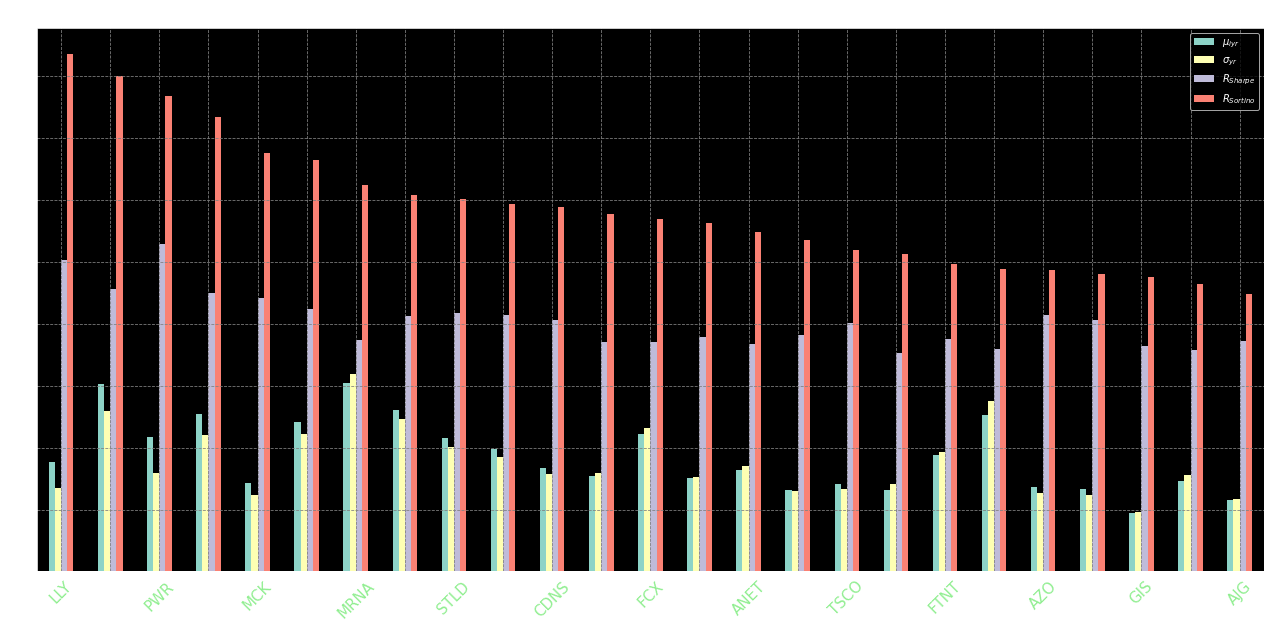

In [ ]:
today = (datetime.date.today()).strftime("%Y-%m-%d")
Sortino25 = vs.selection_data(SP_Assets_r.loc["2020-03-02":today], 0.0169, "S&P 500 Metrics from 2020-03-02 to " +str(today), 25)

The *$AIC$ Akaike $\&$ $BIC$ Bayesian Information Criterion* models are estimators of prediction errors in the *Log-Likelihood* for fitted distributions.<br>
Minimum relative values for $AIC$ and $BIC$ are usually preferred and they are obtained to model $X_i$ resampled data on $W, M$   $\&$ $Q$ periods $P$.<br>
Distribution parameters are criterions are made from the 104 distribution classes and instances for continuous random variables in `Fitter` pkg  *(see refs.)*. <br>
Criterion's goodness of fit is inversely related so they are used together to avoid under/over fitting. They are defined as follows:
+ $AIC = 2k - 2ln(\hat{L})$<br>
+ $BIC = kln(n) - 2ln(\hat{L})$<br>

*where:*<br>

 $k$ = Params. in  model.<br>
 $n$ = No° of observations.<br>
 $\hat{L}$ = $Likelihood_{f_{max.}}$.<br>

In [88]:
dist=([d for d in dir(st) if isinstance(getattr(st, d), getattr(st, "rv_continuous"))])[0:60]
P = [["W", "Weekly"], ["M", "Monthly"], ["Q", "Qtrly."]]
color=["lightyellow", "lightblue", "lightgreen"]

,count,mean,std,min,2.5%,25%,50%,75%,95%,max,mode,skewness,kurtosis
LLY,168.0,0.008455,0.043477,-0.116609,-0.078699,-0.013719,0.007220,0.026872,0.079981,0.144703,-0.116609,0.119933,0.799580
EQT,168.0,0.014467,0.090861,-0.277221,-0.141399,-0.036119,0.012797,0.051732,0.164712,0.461275,-0.277221,0.715775,3.643356
PWR,168.0,0.010346,0.053174,-0.242957,-0.101590,-0.015149,0.011491,0.039471,0.090778,0.191668,-0.242957,-0.485236,3.492832
FSLR,168.0,0.012097,0.078660,-0.176132,-0.115627,-0.032079,0.008080,0.054752,0.146425,0.330538,-0.176132,0.792144,2.097436
MCK,168.0,0.006801,0.037465,-0.105765,-0.058796,-0.013898,0.005726,0.028842,0.065762,0.150352,-0.105765,0.136165,0.817248
NVDA,168.0,0.011542,0.066387,-0.170943,-0.122998,-0.029478,0.007478,0.051415,0.119071,0.220784,-0.170943,0.111803,0.392799
MRNA,168.0,0.014497,0.116777,-0.341603,-0.213326,-0.049944,0.008739,0.064754,0.217331,0.440123,-0.341603,0.451131,1.724388
ON,168.0,0.012416,0.072835,-0.202086,-0.140641,-0.032900,0.013982,0.049781,0.130063,0.243759,-0.202086,0.131855,1.209022
STLD,168.0,0.010313,0.065630,-0.165925,-0.118787,-0.032702,0.014938,0.046914,0.112718,0.180117,-0.165925,-0.043999,0.029154
NUE,168.0,0.009425,0.064787,-0.195669,-0.119152,-0.028958,0.012318,0.049238,0.104615,0.196096,-0.195669,-0.158103,0.532152


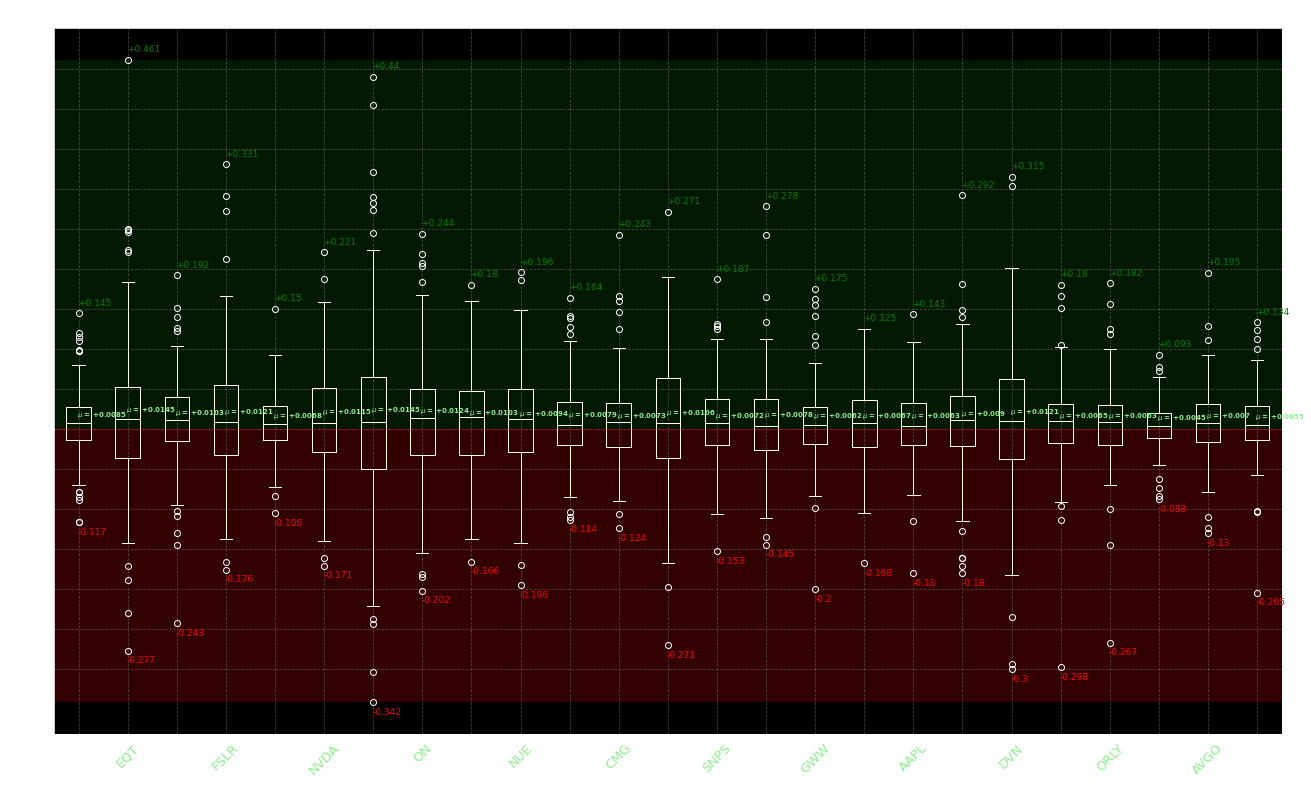

,count,mean,std,min,2.5%,25%,50%,75%,95%,max,mode,skewness,kurtosis
LLY,39.0,0.036422,0.087110,-0.120713,-0.116254,-0.016603,0.038223,0.101675,0.149452,0.218815,-0.120713,-0.195445,-0.840315
EQT,39.0,0.062319,0.189622,-0.303702,-0.219701,-0.021112,0.040628,0.125942,0.288209,0.785913,-0.303702,1.293157,3.944644
PWR,39.0,0.044569,0.086866,-0.147139,-0.120606,0.003934,0.052844,0.096693,0.179521,0.253868,-0.147139,-0.037298,0.076975
FSLR,39.0,0.052108,0.155952,-0.194779,-0.186334,-0.072388,0.066610,0.182481,0.270241,0.404251,-0.194779,0.160926,-0.889795
MCK,39.0,0.029298,0.064712,-0.076684,-0.074690,-0.016917,0.019552,0.065446,0.139089,0.209130,-0.076684,0.703575,0.173719
NVDA,39.0,0.049718,0.150328,-0.368076,-0.213133,-0.022407,0.064015,0.164835,0.248705,0.303955,-0.368076,-0.583321,0.024963
MRNA,39.0,0.062447,0.252930,-0.377496,-0.347122,-0.095784,0.052633,0.157402,0.478104,0.871581,-0.377496,0.842165,1.270544
ON,39.0,0.053485,0.132789,-0.264716,-0.184352,0.011152,0.053626,0.144583,0.264338,0.298621,-0.264716,-0.346704,-0.178168
STLD,39.0,0.044426,0.119521,-0.240008,-0.138137,-0.059212,0.048125,0.117075,0.222968,0.293126,-0.240008,-0.045808,-0.464974
NUE,39.0,0.040602,0.138312,-0.224512,-0.201299,-0.061477,0.027728,0.133603,0.270440,0.309861,-0.224512,0.121663,-0.768944


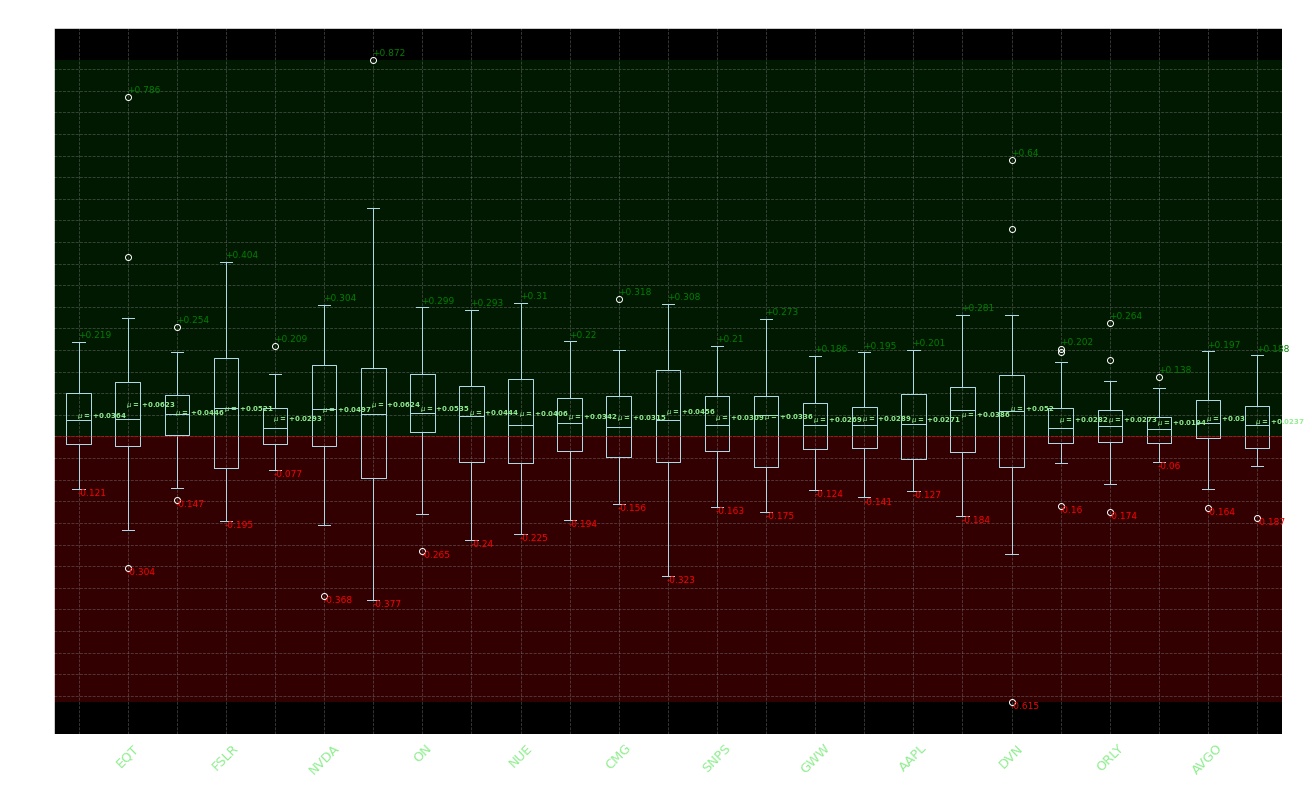

,count,mean,std,min,2.5%,25%,50%,75%,95%,max,mode,skewness,kurtosis
LLY,14.0,0.101462,0.103852,-0.093015,-0.080354,0.024486,0.128494,0.184270,0.231564,0.247995,-0.093015,-0.416335,-0.878487
EQT,14.0,0.173602,0.217686,-0.144545,-0.111848,0.032117,0.115824,0.259772,0.538473,0.619836,-0.144545,0.635536,-0.451439
PWR,14.0,0.124155,0.138458,-0.147139,-0.107089,0.023988,0.144288,0.236734,0.316429,0.323224,-0.147139,-0.234245,-0.835882
FSLR,14.0,0.145158,0.265460,-0.185890,-0.183258,-0.054222,0.065215,0.352624,0.535367,0.703811,-0.185890,0.588316,-0.626602
MCK,14.0,0.081617,0.092990,-0.061134,-0.056429,0.004260,0.091104,0.143454,0.219828,0.228284,-0.061134,-0.014875,-1.090116
NVDA,14.0,0.138501,0.304692,-0.526957,-0.415047,-0.007298,0.053814,0.388629,0.512976,0.680798,-0.526957,-0.303850,0.014779
MRNA,14.0,0.173959,0.390255,-0.298813,-0.298552,-0.139623,0.127955,0.488762,0.721416,0.895174,-0.298813,0.333027,-1.196568
ON,14.0,0.148994,0.240897,-0.264716,-0.235315,-0.016362,0.155318,0.297463,0.471730,0.551668,-0.264716,-0.046226,-0.956103
STLD,14.0,0.123757,0.179814,-0.201306,-0.187482,0.025543,0.148657,0.259651,0.347655,0.349930,-0.201306,-0.421974,-0.876952
NUE,14.0,0.113105,0.190279,-0.318235,-0.251570,0.054692,0.177537,0.201086,0.345083,0.436284,-0.318235,-0.673297,0.271673


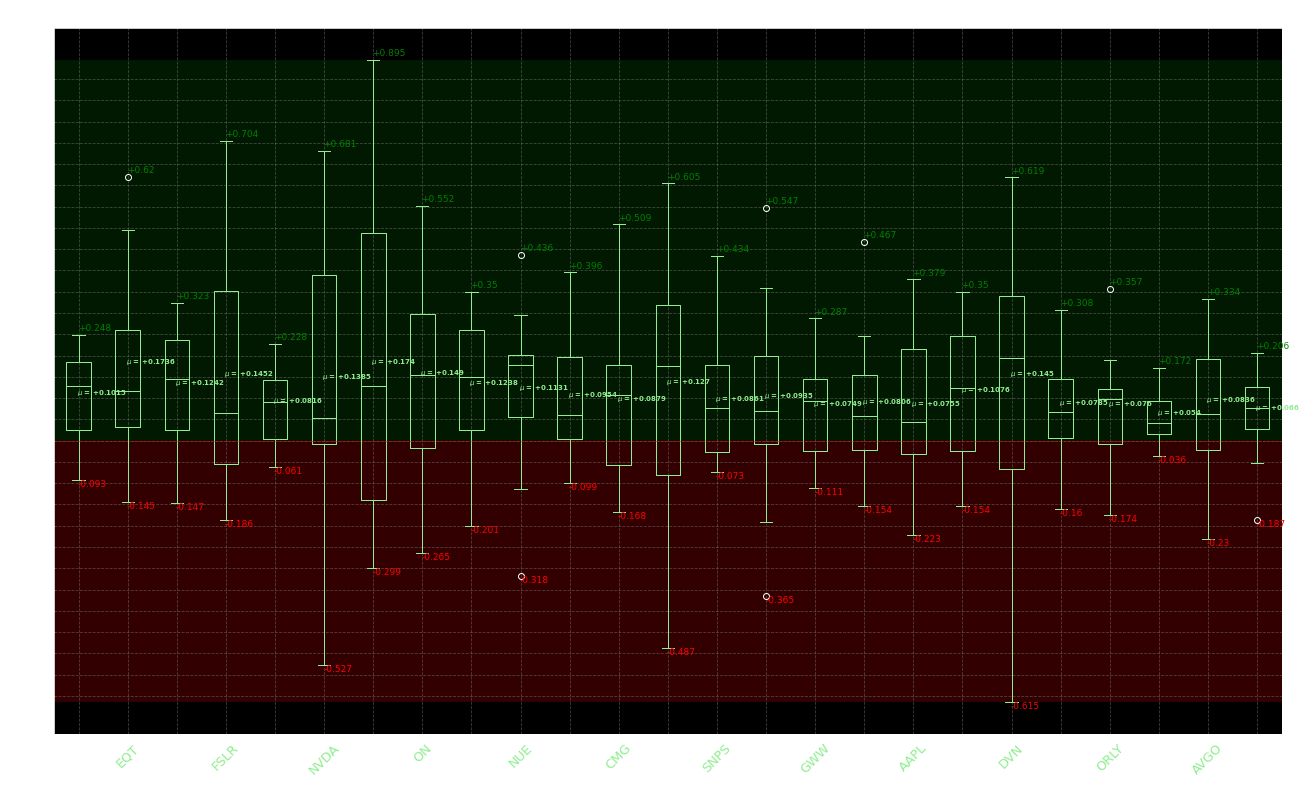

In [89]:
describe = [vs.Stats(SP_Assets_r.loc["2020-03-02":today], Sortino25[2], P[i][0],
                  "S&P 500 Resampling Stats for Sortino Selection on a " + str(P[i][1]) + " basis from ", "2020-03-02", today,
                  [.025, .25, .5, .75, .95], dist, color=color[i]) for i in range(0, len(P))]

##### <font color= 'blue'> 
$X_i$ Estimator Parameters <u> <font>

In [90]:
fn.format_table(describe)

,params,AIC,BIC
"(LLY Wk,)","{'dgamma': (1.1046249196739693, 0.007964212619139589, 0.028932216552302808)}","{'ksone': (1.0289833230613863, -0.11660950200322401, 0.26131225244590106)}","{'laplace': (0.007219984430532789, 0.03195165740544641)}"
"(EQT Wk,)","{'dgamma': (1.2928798213955193, 0.013044990864994027, 0.05056403881583474)}","{'ksone': (1.1931790670462705, -0.2772214666774297, 0.7384969059281963)}",NaN
"(PWR Wk,)","{'dweibull': (1.0911506099489412, 0.010271453743598266, 0.03925702912722312)}","{'gausshyper': (20.96636066157268, 21.9459073756679, -14.095272445148058, 12.8045645329647, -0.5305415496576522, 0.8907710334505179)}","{'hypsecant': (0.01105303248612871, 0.032381999257960356)}"
"(FSLR Wk,)","{'dgamma': (1.3690704586008668, 0.010610246743845479, 0.04296402185806814)}","{'ksone': (1.0000014602804805, -0.1761319119807018, 0.5073448951371986)}",NaN
"(MCK Wk,)","{'gennorm': (1.4468309818340308, 0.006410733625477581, 0.04216375963738379)}","{'gausshyper': (24.515428726365027, 10.717857687873158, 53.06233666211776, 9.961055550935665, -0.14033851253509427, 1.74920308196199)}","{'hypsecant': (0.0066484060622080555, 0.024594183733387034)}"
"(NVDA Wk,)","{'genlogistic': (1.226985768473582, -0.0010654239355056315, 0.03961926220792722)}","{'ksone': (1.001738788640584, -0.17094334640039138, 0.39172763292701107)}",NaN
"(MRNA Wk,)","{'laplace': (0.00873927618406145, 0.08398546964415186)}","{'ksone': (1.0000058679174773, -0.34160366964310773, 0.7817507795230166)}",NaN
"(ON Wk,)","{'genhyperbolic': (0.7246738432539684, 0.7885975577683209, -0.024777342036376562, 0.015789891258425164, 0.0397706183359268)}","{'ksone': (1.088379284147189, -0.20209773602334669, 0.44585648931008515)}","{'hypsecant': (0.012170367882040206, 0.045933408502833936)}"
"(STLD Wk,)","{'laplace_asymmetric': (1.0582152281673687, 0.01598788679961481, 0.05023309527255783)}","{'ksone': (1.0939031782181035, -0.16592482417445864, 0.34604213019512553)}","{'laplace': (0.01493760451928089, 0.050451740262871414)}"
"(NUE Wk,)","{'burr': (13.87962964329862, 0.4452370455064967, -0.3410534017713004, 0.38848005566111876)}","{'ksone': (1.0461344078453032, -0.19566950619821577, 0.39176600649346166)}","{'hypsecant': (0.011108154417189004, 0.04278993850864467)}"


### <font color= 'blue'> 3. Prescriptive Analytics <font> </span>

##### <font color= 'blue'> 3.1 <u>$X_P$<u> Optimizations Prescriptive Models <font>

<span style='color:lightgray'> *Equal weighted datasets are omitted from the analysis for simplicity purposes.* <font>

If we have $n$ unequally weighted datasets $X_i=1,2,.., n$, their weighted average can be concluded:<br>

$$\mu_{P} = \sum_{i=1}^{n} w_{i} \mu_{{X_{i}}}$$ 

For $X_P$ variance $\sigma^2_P$ we need the correlation coefficients for $X_{i,j}$ expressed as $\rho_{i j}$ = $\frac{Cov(X_i, X_{j})}{\sigma_{i} \sigma_{j}}$ and thus, their fluctuations directional relationship.<br>
So it can be expressed as:

$$\sigma^2_P=\sum_{i=1}^{n}\sum_{j=1}^{n}w_{i}w_{j}\sigma_{i}\sigma_{j}\rho_{ij}$$ 


By substitution we are left with: 

$$\sigma^2_P = \sum_{i=1}^{n}\sum_{j=1}^{n}w_{i}w_{j}Cov(X_i, X_j)$$

Which needs to be expressed as a product of matrices $\times$ vectors:<br>

$\sigma^2_{P} = \vec{w}^T \times Cov_{i,j} \times \vec{w}$<br>

Expressed as the following in its expanded form:<br> 

$$\sigma^2_{P} = {\left[\begin{array}{cccc}w_{1} & w_{2} & \cdots & w_{n}\end{array}\right] \cdot \left[\begin{array}{cccc}1 & \rho_{1,2} & \cdots & \rho_{1,n} \\ \rho_{2,1} & 1 & \cdots & \rho_{2,n} \\ \vdots & \vdots & \ddots & \vdots \\ p_{n,1} & \cdots & \cdots & 1\end{array}\right] \cdot \left[\begin{array}{cccc}w_{1} \\ w_{2} \\ \vdots \\ w_{n}\end{array}\right]}$$

Having obtained its variance, the Ratios include sensitivities $\beta$ for $X_P:$ 

$\beta({r_P, r_{t_{S\&P500}}})$ = $\frac{Cov(r_P,r_{t_{S\&P500}})}{Var(r_{t_{S\&P500}})}$ 

To compute the metrics we substitute $\beta^{-1}$ $\times$ their excess returns.
+ $R_{Treynor}({r_P, r_{t_{S\&P500}}}) = \frac{Var(R_{mkt})[\mu_P - {rf}]}{Cov(r_P,r_{t_{S\&P500}})}$ or units of slope sensitivities per unit of $P$ excess returns.

+ $R_{Jensen}({r_P, r_{t_{S\&P500}}}) = {rf} + \frac{Var(r_{t_{S\&P500}})[r_{t_{S\&P500}} - {rf}]}{Cov(r_P,r_{t_{S\&P500}})}$ or units of slope sensitivities per unit of $S\&P500$ excess returns, + $r_f$.

Optimizations can now made and validated for given metrics as it is required: <br><br>
+ $R_{Treynor_{Arg_{max}}}$
+ $R_{Sharpe_{Arg_{max}}}$
+ $R_{Sortino_{Arg_{max}}}$
+ $\sigma^2_{P_{Arg_{min}}}$

In [111]:
def Optimizer(Assets, index, rf, title):
    Asset_ret = (Assets.pct_change()).iloc[1:, :].dropna(axis = 1)
    index_ret = index.pct_change().iloc[1:, :].dropna(axis = 1)
    index_ret = index_ret[index_ret.index.isin(Asset_ret.index)]

    mean_ret = Asset_ret.mean() * 252
    cov = Asset_ret.cov() * 252

    N = len(mean_ret)
    w0 = np.ones(N) / N
    bnds = ((0, None), ) * N
    cons = {"type" : "eq", "fun" : lambda weights : weights.sum() - 1}

    def Max_Sharpe(weights, Asset_ret, rf, cov):
        rp = np.dot(weights.T, Asset_ret)
        sp = np.sqrt(np.dot(weights.T, np.dot(cov, weights)))
        RS = (rp - rf) / sp
        return -(np.divide(np.subtract(rp, rf), sp))
    
    def Min_Var(weights, cov):
        return np.dot(weights.T, np.dot(cov, weights)) 
    
    # def Min_Traynor(weights, Asset_ret, rf, cov):
    #     rp = np.dot(weights.T, Asset_ret)
    #     varp = np.dot(weights.T, np.dot(cov, weights))
    #     RT = (rp - rf) / sp
    #     return -(np.divide(np.subtract(rp, rf), sp))
    
    #-----------------------------------------------------------------------------------------------------------------------------------------------------------------------
    
    opt_EMV = optimize.minimize(Max_Sharpe, w0, (mean_ret, rf, cov), 'SLSQP', bounds = bnds,
                                constraints = cons, options={"tol": 1e-10})
    
    W_EMV = pd.DataFrame(np.round(opt_EMV.x.reshape(1, N), 4), columns = Asset_ret.columns, index = ["Weights"])
    W_EMV[W_EMV <= 0.0] = np.nan
    W_EMV.dropna(axis = 1, inplace = True)

    RAssets = Asset_ret[Asset_ret.columns[Asset_ret.columns.isin(W_EMV.columns)]]
    # MuAssets = mean_ret[mean_ret.index.isin(W_EMV.columns)]
    R_EMV = pd.DataFrame((RAssets*W_EMV.values).sum(axis = 1), columns = ["$r_{Sharpe_{Arg_{max}}}$"])
    index_ret.rename(columns={index_ret.columns[0]: "$r_{mkt}$" }, inplace=True)
    R_EMV.insert(1, index_ret.columns[0], index_ret.values)

    Muopt_EMV = np.dot(opt_EMV.x.T, mean_ret) 
    Sopt_EMV = np.sqrt(np.dot(opt_EMV.x.T, np.dot(cov, opt_EMV.x)))
    Beta_EMV = np.divide((np.cov(R_EMV.iloc[0], R_EMV.iloc[1])[0][1]), R_EMV.iloc[1].var())
    SR_EMV = (Muopt_EMV - rf) / Sopt_EMV

    #-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

    opt_MinVar = optimize.minimize(Min_Var, np.ones(N) / N, (cov,), 'SLSQP', bounds = bnds,
                                   constraints = cons, options={"tol": 1e-10})

    W_MinVar = pd.DataFrame(np.round(opt_MinVar.x.reshape(1, N), 4), columns = Asset_ret.columns, index = ["Weights"])
    W_MinVar[W_MinVar <= 0.0] = np.nan
    W_MinVar.dropna(axis = 1, inplace = True)

    RAssets_MinVar = Asset_ret[Asset_ret.columns[Asset_ret.columns.isin(W_MinVar.columns)]]
    R_MinVar = pd.DataFrame((RAssets_MinVar*W_MinVar.values).sum(axis = 1), columns = ["$r_{Var_{Arg_{min}}}$"])
    R_EMV.insert(2, R_MinVar.columns[0], R_MinVar.values)

    Muopt_MinVar = np.dot(opt_MinVar.x.T, mean_ret) 
    Sopt_MinVar = np.sqrt(np.dot(opt_MinVar.x.T, np.dot(cov, opt_MinVar.x)))
    Beta_MinVar = np.divide((np.cov(R_EMV.iloc[2], R_EMV.iloc[1])[0][1]), R_EMV.iloc[1].var())
    SR_MinVar = (Muopt_MinVar - rf) / Sopt_MinVar

    #-----------------------------------------------------------------------------------------------------------------------------------------------------------------------
    #opt_Traynor = 
    
    #-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

    Mu, Sigma, Beta, SR = [Muopt_EMV, Muopt_MinVar], [Sopt_EMV, Sopt_MinVar], [Beta_EMV, Beta_MinVar], [SR_EMV, SR_MinVar]
    index = ["$r_{P{Sharpe_{Arg_{max}}}}$", "$r_{Var_{Arg_{min}}}$"]
    Popt = [pd.DataFrame({"$\mu_P$" : Mu[i], "$\sigma_P$" : Sigma[i], "$\Beta_{P}$": Beta[i], "$r_{Sharpe_{Arg_{max}}}$" : SR[i]},
                          index = [index[i]]) for i in range(0, len(Mu))]
    
    Popt[0].index.name = title
    Popt[1].index.name = title
    R_EMV = R_EMV[[R_EMV.columns[1], R_EMV.columns[2], R_EMV.columns[0]]]
    #Get the cumulative returns with cumsum for rmkt, rEMV and rMinVar
    accum = R_EMV.cumsum()

    Argmax = [d.Markdown(tabulate(Popt[i], headers = "keys", tablefmt = "pipe")) for i in range(0, len(Popt))]
    R_EMV = d.Markdown(tabulate(R_EMV, headers = "keys", tablefmt = "pipe"))
    
    return Argmax, R_EMV, accum

In [151]:
bench_md = "$S\&P500_{{20_{03}-23_{05}}}$"
Argmax, R_EMV, accum = Optimizer(SP_Assets_r.loc["2020-03-02":today], SP_r.loc["2020-03-02":today], 0.0169, bench_md)

Port = display(Argmax[0], Argmax[1])

| $S\&P 500_{P{_{opt}}}$      |   $\mu_P$ |   $\sigma_P$ |   $\Beta_{P}$ |   $r_{Sharpe_{Arg_{max}}}$ |
|:----------------------------|----------:|-------------:|--------------:|---------------------------:|
| $r_{P{Sharpe_{Arg_{max}}}}$ |  0.495769 |      0.23309 |      -3.08171 |                    2.05444 |

| $S\&P 500_{P{_{opt}}}$   |   $\mu_P$ |   $\sigma_P$ |   $\Beta_{P}$ |   $r_{Sharpe_{Arg_{max}}}$ |
|:-------------------------|----------:|-------------:|--------------:|---------------------------:|
| $r_{Var_{Arg_{min}}}$    | 0.0855699 |     0.148384 |      -4.75479 |                   0.462785 |

In [177]:
d.Markdown(tabulate(accum.dropna()[0:10], headers = "keys", tablefmt = "pipe")) 
#Non sliced: d.Markdown(tabulate(accum.diff().dropna()[], headers = "keys", tablefmt = "pipe")) 

| formatted_date   |   $r_{mkt}$ |   $r_{Var_{Arg_{min}}}$ |   $r_{Sharpe_{Arg_{max}}}$ |
|:-----------------|------------:|------------------------:|---------------------------:|
| 2020-03-03       |  -0.0281079 |             -0.0189032  |                 -0.0159923 |
| 2020-03-04       |   0.0140947 |              0.0175976  |                  0.0210056 |
| 2020-03-05       |  -0.0198274 |              0.00513731 |                  0.0196623 |
| 2020-03-06       |  -0.0368812 |             -0.00316668 |                  0.0186721 |
| 2020-03-09       |  -0.112851  |             -0.0388923  |                 -0.0374197 |
| 2020-03-10       |  -0.0634546 |             -0.0187687  |                 -0.0162829 |
| 2020-03-11       |  -0.112323  |             -0.0523152  |                 -0.0464305 |
| 2020-03-12       |  -0.207436  |             -0.111313   |                 -0.11292   |
| 2020-03-13       |  -0.114565  |             -0.0689652  |                 -0.0231125 |
| 2020-03-16       |  -0.234405  |             -0.117769   |                 -0.0744541 |

In [187]:
def Accum_ts(accum):
    """
    Accum_ts is a function that plots time-series in a dataframe with 3 strategies as cols with matplot.
    Given dates in X-axis labels are formatted on a monthly / yearly basis for visualization purposes.
    Parameters:
    ----------
    accum : dataframe
        Dataframe with time-series to plot.
    Returns:
    -------
    Plot
        Plot of time-series in dataframe.
    """
    fig, ax = plt.subplots(figsize = (15, 7))
    ax.plot(accum.index, accum.iloc[:, 0], color = "red", label = accum.columns[0])
    ax.plot(accum.index, accum.iloc[:, 1], color = "green", label = accum.columns[1])
    ax.plot(accum.index, accum.iloc[:, 2], color = "blue", label = accum.columns[2])
    ax.set_title("Cumulative Returns", fontsize = 20)
        # ax.set_xlabel("Date", fontsize = 12)
        # ax.set_ylabel("$X_p Cumulative Returns", fontsize = 15)
    ax.legend(loc = "upper left", fontsize = 15)
    ax.grid(True)
    ax.grid(which='major', color='gray', linestyle='--', linewidth=0.5)
    #Set set ticks every month and format them
    ax.xaxis.set_major_locator(matplotlib.dates.MonthLocator())
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %Y'))
    #Make y axis ticks as percentage every month
    ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(xmax=1, decimals=0))
    
    plt.show()

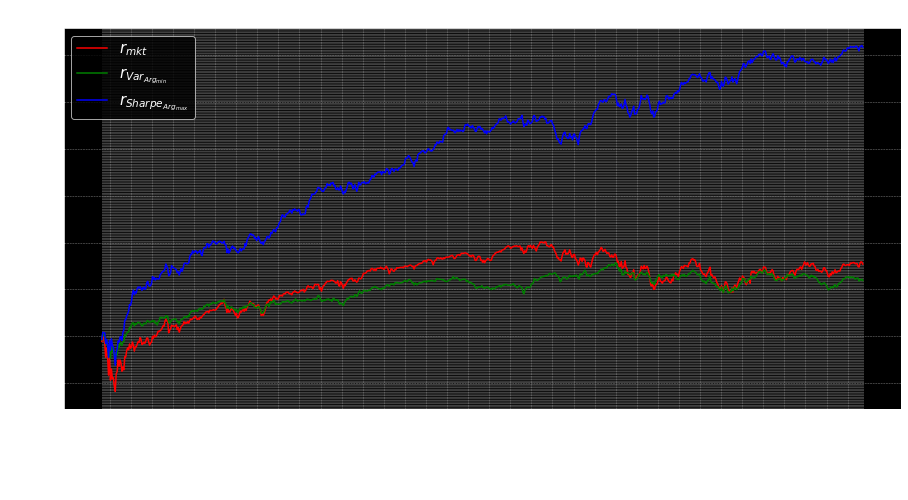

In [188]:
vs.Accum_ts(accum)

##### <font color= 'lightblue'> Metrics: <font>

Confusion Matrix: $\begin{bmatrix} TP & FP \\ FN & TN \end{bmatrix}$

Metrics:

- Accuracy: $\frac{TP + TN}{TP + TN + FP + FN}$ or the ability of the classifier to find + and - samples.

- Precision: $\frac{TP}{TP + FP}$ or the ability of the classifier not to label + samples as -.

- Recall: $\frac{TP}{TP + FN}$ or the ability of the classifier to find all + samples.

- F1 Score: $2 * \frac{Precision * Recall}{Precision + Recall}$ or Precision and Recall equilibrated score through the harmonic mean.    

- ROC AUC: $\frac{TPR}{FPR}$ or the ability of the classifier to find + samples and not - samples. Where a bigger number denotes a better model.

<span style='color:lightyellow'> **Note:** Do not consider the results in this repository or its proceedures as an investment advice or recommendation. <font> 

~ *Past performance is not a guarantee of future results and the market is not always rational.* 

#### <font color= 'gray'>*¿How to reach me?* <font>

[![Website](https://img.shields.io/badge/Website-1f07f5?style=flat-square&logo=google-chrome&logoColor=white)](https://estebanmqz.github.io/Portfolio/)
[![LinkedIn](https://img.shields.io/badge/LinkedIn-173de8?style=flat-square&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/esteban-m-653817205/)
[![E-mail](https://img.shields.io/badge/Business-Mail-083600?style=flat-square&logo=mail&logoColor=white)](mailto:esteban@esteban.com)
[![Github](https://img.shields.io/badge/GitHub-100000?style=flat-square&logo=github&logoColor=white)](https://github.com/EstebanMqz)